In [5]:
import gym, gym_unbalanced_disk, time
import numpy as np
from stable_baselines3 import PPO, SAC
import matplotlib.pyplot as plt

In [18]:
def normalise_angle(theta):
    return ((theta)%(2*np.pi))-np.pi

def compute_reward(self):
    q=normalise_angle(self.th)
    if abs(q)<np.pi/3:
        return 500 - 10*self.omega**2 +(self.u/self.omega)**2
    else:
        return q**2+20*self.omega**2+self.u**2 # +10*(self.u/self.omega)**2

In [19]:
target_angle=np.pi
reward_fun = lambda self: (np.cos(self.th - target_angle)+1)**2  - np.cos(self.th-(np.pi+target_angle)) - 0.1 *(self.omega)**2 - 0.001*(self.u)**2 # mediocre
reward_fun = lambda self: np.exp(-(self.th%(2*np.pi)-np.pi)**2/(2*(np.pi/7)**2)) #example reward function, change this! Okay
reward_fun=lambda self: -((self.th%(2*np.pi)-np.pi)**2 + 0.5 * self.omega**2)
reward_fun=lambda self: -((self.th-np.pi)%(2*np.pi)**2 + 0.1 * self.omega**2 + 0.001 * self.u**2)
reward_fun =  lambda self: ((np.cos(self.th-target_angle)+1.5)*2 - 0.25) + 0.00125*(((np.cos(self.th)+1)/2)*(self.omega)**2) - 0.01*((self.u)**2)
reward_fun = lambda self: 5*normalise_angle(self.th)**2+0.1*self.omega**2-1.5*self.u**2
reward_fun = lambda self: compute_reward(self)


env = gym.make('unbalanced-disk-v0', dt=0.025, umax=3.,reward_fun=reward_fun) 

model = PPO('MlpPolicy', env, verbose=1) #b)
# model = SAC('MlpPolicy', env, verbose=2, learning_starts=1000) #b)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [21]:
model.learn(total_timesteps=100_000, )

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | 1.39e+04 |
| time/              |          |
|    fps             | 246      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 300         |
|    ep_rew_mean          | 2.17e+04    |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 2           |
|    time_elapsed         | 18          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007658064 |
|    clip_fraction        | 0.0793      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 5.96e-06    |
|    learning_rate        | 0.

KeyboardInterrupt: 

In [ ]:
env.close()

In [14]:
obs = env.reset()
thetas=[]
omegas=[]
rewards=[]
try:
    for _ in range(1000):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        env.render()
        thetas.append(obs[0])
        omegas.append(obs[1])
        rewards.append(reward)
        time.sleep(1/50)
        if done:
            obs=env.reset()
finally:
    env.close()

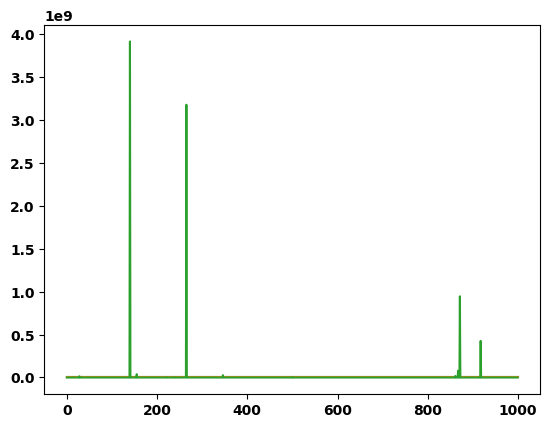

In [17]:
plt.plot(thetas)
plt.plot(omegas)
plt.plot(rewards)

In [ ]:
# obs = env.reset()
# thetas=[]
# windup_time=15
# us=np.array([3]*windup_time + [-3]*(1000-windup_time))*(-1)
# try:
#     for i in range(1000):
#         obs, reward, done, info = env.step(us[i])
#         thetas.append(obs[0])
#         env.render()
#         time.sleep(1/50)
#         if done:
#             env.reset()
# finally:
#     env.close()


KeyboardInterrupt: 